# ボストン住宅価格　線形回帰

## 線形回帰とは何か

以下の観点をすべて含めて記述しましょう。

- 線形回帰とは何か。

線形回帰とは、ある入力値から予測する値が連続的な値をとることを言います。

- 具体的に言うと？

具体的に言うと、ある特徴量をxとして、xを用いてyをある関数で表せることを意味しています。

- 分類と何か違うのか。

線形回帰が連続的な値をとることに対し、分類は離散したどのカテゴリに当てはまるかを予測することです。

## データを取得する

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

## 取得データをDataFrameにする

In [2]:
import pandas as pd
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=pd.DataFrame(boston.target)

## 説明変数を’LSTAT’のみにする

In [3]:
X = X.loc[:, ['LSTAT']]

## 単回帰と重回帰についての違いを記述せよ

答え 単回帰は説明変数が1つ、重回帰は複数。

## データを確認する

In [4]:
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [5]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## テストデータに分割する

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## データの形状を確認する

In [7]:
X_train.shape

(404, 1)

In [8]:
X_test.shape

(102, 1)

In [9]:
y_train.shape

(404, 1)

In [10]:
y_test.shape

(102, 1)

## 学習

In [11]:
from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()
lin_1d.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
score_1d = lin_1d.score(X_test, y_test)
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.43


## 決定係数とは何か記述せよ
以下の観点をすべて含めて記述しましょう。

- 決定係数とは何か

決定係数は、どれだけモデルが正しいかの指標。

- もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか

もっとも説明変数が目的変数を説明できる場合、決定係数は1になる。

- どのように求めることができるか

決定係数 $R$ は教師情報 $t_i$ と予測値 $y_i$ 及び教師情報の平均 $\mu$ を使って以下のように表されます。

$$ R^2=1-\frac{\frac{1}{N}\sum_i^N(y_i-t_i)^2}{\frac{1}{N}\sum_i^N(y_i-\mu)^2} $$

## 決定係数をいかなる場合も信じても良いか記述せよ(決定係数が高ければ、汎用性があるモデルと言えるか)

- 決定係数が正しく評価できない例を答えよ

対象のデータのみに特化している場合、汎用性があるとは言えない。

## 2,3,4次式の回帰

In [13]:
from sklearn.preprocessing import PolynomialFeatures

lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

X_train_2 = degree_2.fit_transform(X_train)
X_train_3 = degree_3.fit_transform(X_train)
X_train_4 = degree_4.fit_transform(X_train)

lin_2d.fit(X_train_2, y_train)
lin_3d.fit(X_train_3, y_train)
lin_4d.fit(X_train_4, y_train)

X_test_2 = degree_2.fit_transform(X_test)
X_test_3 = degree_3.fit_transform(X_test)
X_test_4 = degree_4.fit_transform(X_test)

score_2d = lin_2d.score(X_test_2, y_test)
score_3d = lin_3d.score(X_test_3, y_test)
score_4d = lin_4d.score(X_test_4, y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


## 次数が大きくなるとどうなるか記述せよ
以下の観点をすべて含めて記述しましょう。

- 説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b）

2次式 $ax^2+bx+c$

3次式 $ax^3+bx^2+cx+d$

- 次数を増やすとどのようなメリットが考えられるか

次数を増やすメリットは、直線では表現できないモデルを表現できる。

- 次数を増やすとどのようなデメリットが考えられるか

デメリットは、過学習を起こす恐れがある。

## 重回帰

今回は、LSTATのみを使用したが、他の特徴量も使用して学習させましょう。

In [14]:
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=pd.DataFrame(boston.target)

X_N = X.loc[:, ['RM', 'LSTAT']]

X_N_train,X_N_test,y_train,y_test=train_test_split(X_N,y,test_size=0.2,random_state=0)

lin_1d_N = LinearRegression()
lin_2d_N = LinearRegression()
lin_3d_N = LinearRegression()
lin_4d_N = LinearRegression()
lin_5d_N = LinearRegression()

degree_2_N = PolynomialFeatures(degree=2)
degree_3_N = PolynomialFeatures(degree=3)
degree_4_N = PolynomialFeatures(degree=4)
degree_5_N = PolynomialFeatures(degree=5)

X_N_train_2 = degree_2_N.fit_transform(X_N_train)
X_N_train_3 = degree_3_N.fit_transform(X_N_train)
X_N_train_4 = degree_4_N.fit_transform(X_N_train)
X_N_train_5 = degree_5_N.fit_transform(X_N_train)

lin_1d_N.fit(X_N_train, y_train)
lin_2d_N.fit(X_N_train_2, y_train)
lin_3d_N.fit(X_N_train_3, y_train)
lin_4d_N.fit(X_N_train_4, y_train)
lin_5d_N.fit(X_N_train_5, y_train)

X_N_test_2 = degree_2_N.fit_transform(X_N_test)
X_N_test_3 = degree_3_N.fit_transform(X_N_test)
X_N_test_4 = degree_4_N.fit_transform(X_N_test)
X_N_test_5 = degree_5_N.fit_transform(X_N_test)

X_N_score_1d = lin_1d_N.score(X_N_test, y_test)
X_N_score_2d = lin_2d_N.score(X_N_test_2, y_test)
X_N_score_3d = lin_3d_N.score(X_N_test_3, y_test)
X_N_score_4d = lin_4d_N.score(X_N_test_4, y_test)
X_N_score_5d = lin_5d_N.score(X_N_test_5, y_test)

print("一次式における住宅価格への決定係数は%.2f"%(X_N_score_1d))
print("二次式における住宅価格への決定係数は%.2f"%(X_N_score_2d))
print("三次式における住宅価格への決定係数は%.2f"%(X_N_score_3d))
print("四次式における住宅価格への決定係数は%.2f"%(X_N_score_4d))
print("五次式における住宅価格への決定係数は%.2f"%(X_N_score_5d))

一次式における住宅価格への決定係数は0.54
二次式における住宅価格への決定係数は0.65
三次式における住宅価格への決定係数は0.65
四次式における住宅価格への決定係数は0.58
五次式における住宅価格への決定係数は0.58


## 重回帰について記述せよ
以下の観点をすべて含めて記述しましょう。

- 説明変数を増やすことでどのようなメリットがあるか
- 説明変数を増やすことでどのようなデメリットがあるか

メリットはモデルを表現しやすくなる。 デメリットは、計算量がおおくなる。

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

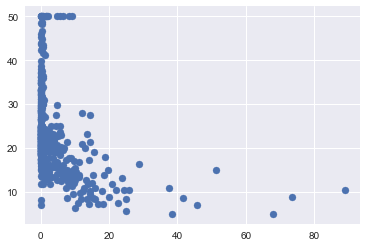

In [16]:
x=X['CRIM'].values
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(x,y)

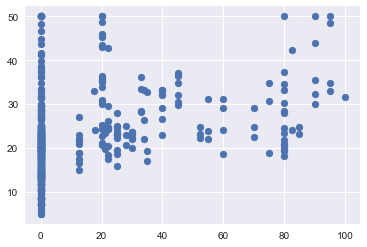

In [17]:
x=X['ZN'].values
plt.scatter(x,y)

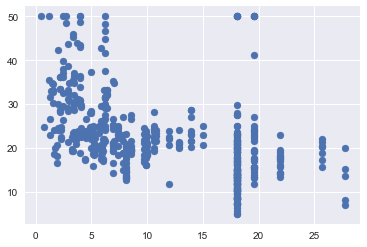

In [18]:
x=X['INDUS'].values
plt.scatter(x,y)

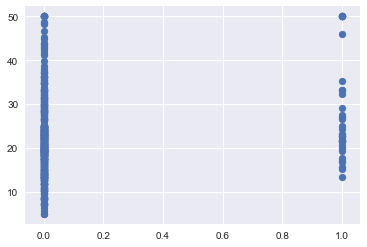

In [19]:
x=X['CHAS'].values
plt.scatter(x,y)

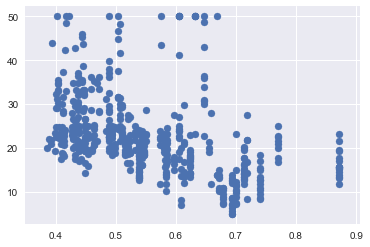

In [20]:
x=X['NOX'].values
plt.scatter(x,y)

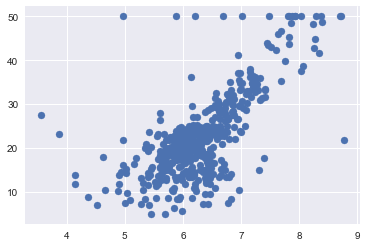

In [21]:
x=X['RM'].values
plt.scatter(x,y)

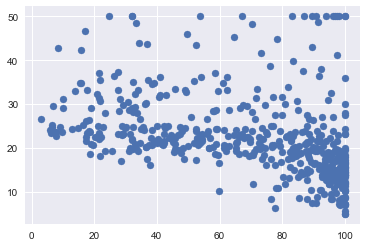

In [22]:
x=X['AGE'].values
plt.scatter(x,y)

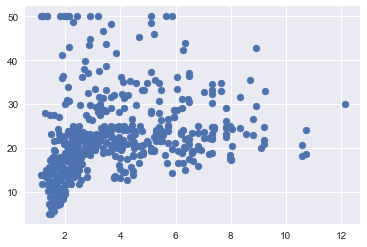

In [23]:
x=X['DIS'].values
plt.scatter(x,y)

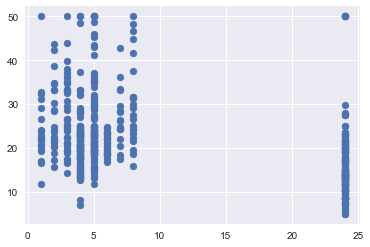

In [24]:
x=X['RAD'].values
plt.scatter(x,y)

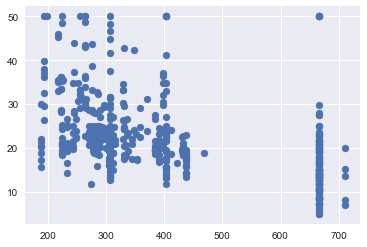

In [25]:
x=X['TAX'].values
plt.scatter(x,y)

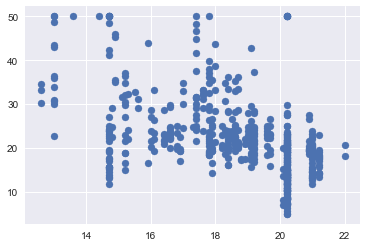

In [26]:
x=X['PTRATIO'].values
plt.scatter(x,y)

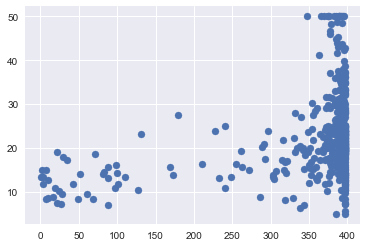

In [27]:
x=X['B'].values
plt.scatter(x,y)

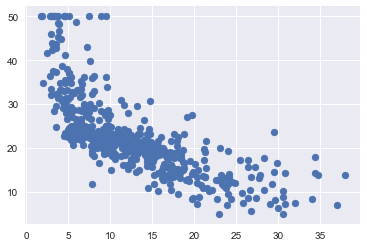

In [28]:
x=X['LSTAT'].values
plt.scatter(x,y)